<a href="https://colab.research.google.com/github/Ling-Yee/Ling-Yee/blob/master/Bank_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting subscription to bank term deposit product under a phone marketing campaign

### Data
The data is extracted from Kaggle : https://www.kaggle.com/henriqueyamahata/bank-marketing

### Features

#### Related to customer's background
* Age: (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

In [0]:
# Comment: We would have to investigate the frequency of "unknown" instances

#### Related to last contact to the clients under the campaign

* Contact: contact communication type (categorical:
'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric) 
Important note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

In [0]:
### Comment: Would investigate the correlation between Duration and DV,
### Dont include Duration in our model

### Other attributes of client/ campaign:
* Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
* Previous: number of contacts performed before this campaign and for
this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

### Related to Socioeconomic context:
* Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
* Euribor3m: euribor (basic interest rate used in EU interbank market) 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

### Target variable/ Dependent variable (DV)
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

#### Load Data and tools

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

After changed the delimiter format of the raw csv file from semicolon to comma, we upload the data

In [3]:
from google.colab import files
data_to_load = files.upload()

#df = pd.read_csv("bank-marketing-data.csv")

Saving bank-marketing-data.csv to bank-marketing-data.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(data_to_load["bank-marketing-data.csv"]))

In [0]:
df.shape

(41188, 21)

There are 20 features, 41188 subjects in the data

In [18]:
# Splot the data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop("y", axis = 1)
y = df["y"]
y.isna().sum()

0

In [0]:
np.random.seed(45)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape, y_train.shape

((32950, 20), (32950,))

In [21]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6125,47,technician,married,professional.course,unknown,yes,no,telephone,may,tue,272,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7608,41,blue-collar,married,basic.4y,no,no,no,telephone,may,fri,512,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0
14291,42,technician,married,professional.course,unknown,yes,no,cellular,jul,mon,77,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
29172,32,blue-collar,single,high.school,no,yes,no,cellular,apr,fri,1080,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
21909,36,technician,single,university.degree,no,yes,no,cellular,aug,wed,123,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


### Exploratory Data Analysis

In [22]:
y_train.value_counts()

no     29250
yes     3700
Name: y, dtype: int64

In [0]:
# Comment: Our data class is imbalanced, beware of evaluation metrics 

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 6125 to 6558
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-nul

In [25]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

There are no empty cells.

In [26]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.050531,258.156783,2.558786,962.623794,0.173141,0.084671,93.576860,-40.488774,3.624429,5167.078807
std,10.443274,261.787082,2.774802,186.551025,0.496589,1.570279,0.578879,4.625069,1.734009,72.279889
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


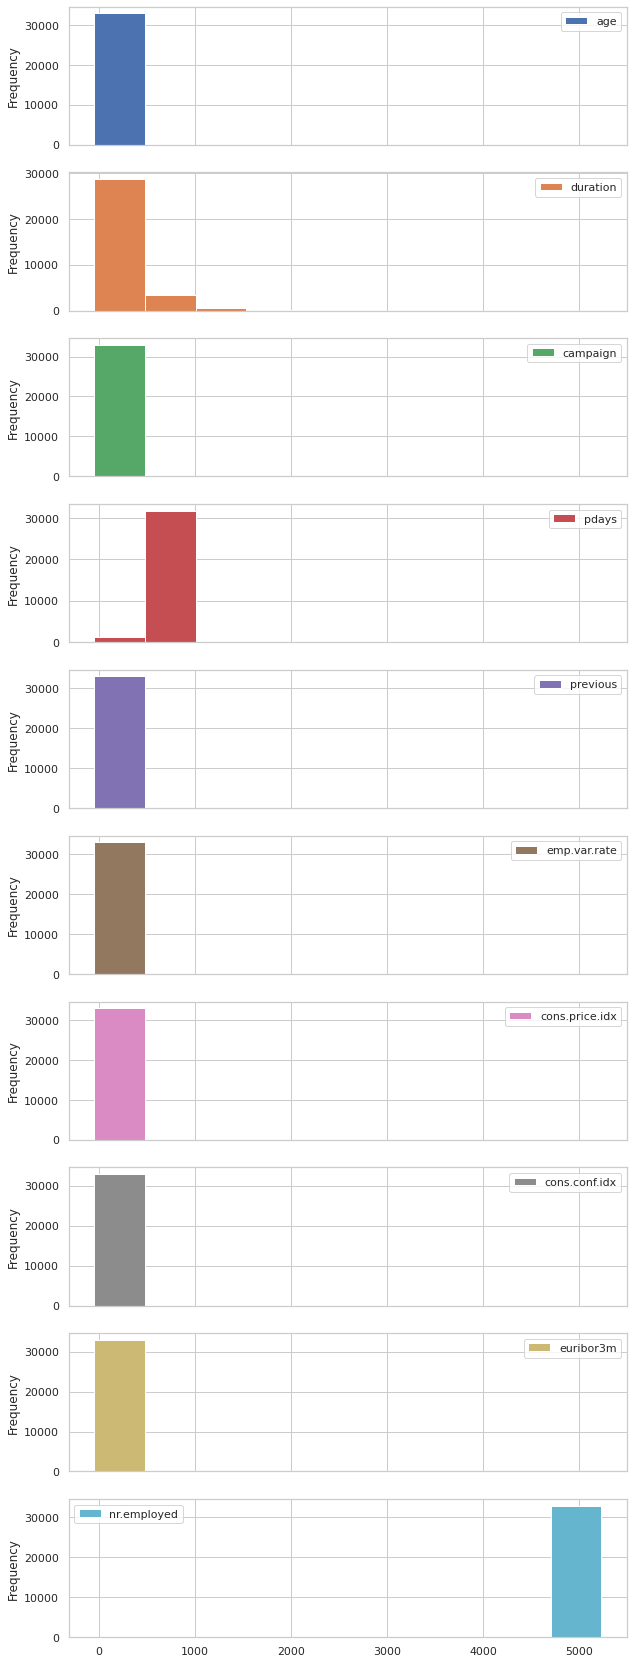

In [27]:
X_train.plot.hist(figsize=(10,30),subplots=True, bins=10);

nr.employed, pdays and duration have different scales than the rest of the data, let's look at them separately

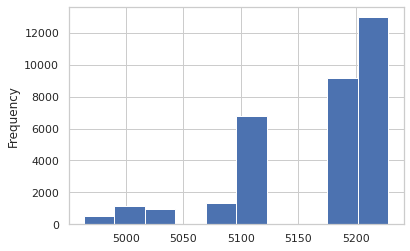

In [28]:
X_train["nr.employed"].plot.hist(bins=10);

In [29]:
X_train["nr.employed"].value_counts()

5228.1    12983
5099.1     6776
5191.0     6251
5195.8     2942
5076.2     1343
5017.5      849
4991.6      641
5008.7      520
4963.6      502
5023.5      137
5176.3        6
Name: nr.employed, dtype: int64

nr.employed's distribution is not normal and there seems to be 3 clusters in the population. Let' see if this interacts with subscription rate. 

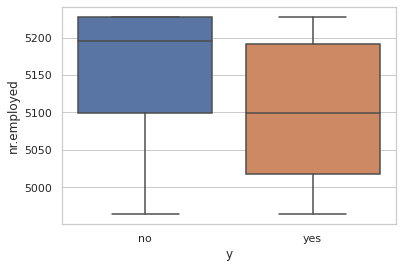

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
temp_data = pd.concat([y_train, X_train["nr.employed"]], axis=1)
ax = sns.boxplot(x="y", y="nr.employed", data = temp_data);

Seems like higher number of this No. of Employed indicator is correlated with lower subscription rate. Let's see if discretize nr.employed help us clarify the interaction.

In [0]:
X_train["nr.employed"].describe()

count    32950.000000
mean      5167.078807
std         72.279889
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [0]:
cut_labels = ["Below5100", "5100-5199", "5200-5229","5230orAbove"]
cut_bins = [0,5100,5200,5230,float("inf")]
nremployed_discrete = pd.cut(X_train["nr.employed"], bins = cut_bins, labels = cut_labels, right = False)

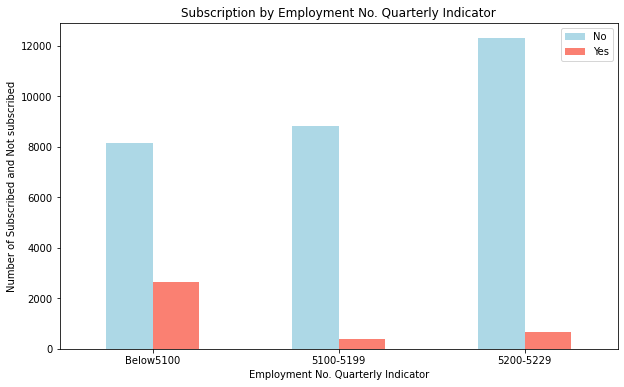

In [0]:
temp_data = pd.crosstab(nremployed_discrete, y_train)
#temp_data = temp_data.reindex(index=nremployed_discrete, columns=y_train, fill_value=0)
temp_data.plot(kind="bar",
              figsize=(10,6),
              color=["lightblue","salmon"])
plt.title("Subscription by Employment No. Quarterly Indicator")
plt.xlabel("Employment No. Quarterly Indicator")
plt.ylabel("Number of Subscribed and Not subscribed")
plt.legend(["No","Yes"])
plt.xticks(rotation = 0);

We discretize "nr.employed" into 4 levels by IQR when in fact there's no example above 75th quantitle (5229). The number of instances in each bin shown above is quite even. We shall alter nr.employed in this way.

In [0]:
cut_labels = ["Below5100", "5100-5199", "5200orAbove"]
cut_bins = [0,5100,5200,float("inf")]
X_train["nr.employed"] = pd.cut(X_train["nr.employed"], bins = cut_bins, labels = cut_labels, right = False)
X_test["nr.employed"] = pd.cut(X_test["nr.employed"], bins = cut_bins, labels = cut_labels, right = False)

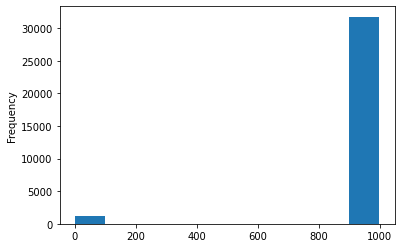

In [0]:
X_train["pdays"].plot.hist(bins=10);

In [0]:
X_train["pdays"].value_counts()

999    31743
3        359
6        318
4         93
2         51
7         51
9         50
12        44
10        43
5         38
13        30
1         20
11        19
15        19
8         15
14        15
0         12
16         8
18         7
17         6
19         3
22         2
25         1
20         1
21         1
26         1
Name: pdays, dtype: int64

The "pdays" variable represent the number of days passed after last contact with the client before this campaign. The category "999" represents a client was not contacted prior to this campaign, as we could see, the majority of clients belongs to this category. I think it would be a good idea to discretize this particular variable. Let's look at the distribution excluding "999".

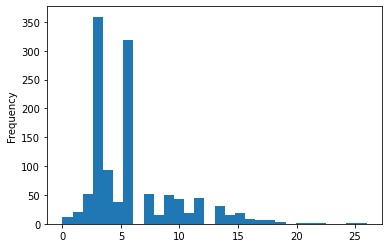

In [0]:
X_train[X_train["pdays"] != 999].pdays.plot.hist(bins=30);

Let's see if subscription rate differs for this subset of "pdays" 

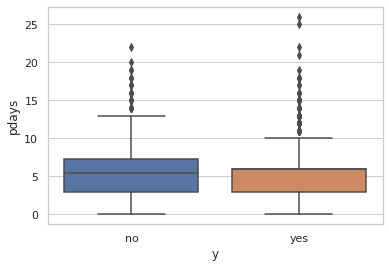

In [0]:
subset_pdays = X_train[X_train["pdays"] != 999].pdays
temp_data = pd.concat([y_train,subset_pdays],axis=1)

ax = sns.boxplot(x="y", y="pdays", data=temp_data);

"pdays" doesnt seem to differ much across y. In view of the small sample in this subset, I think we could discretize "pdays" into "Not Applicable" and "Applicable", i.e. old clients and new clients. In fact, this info could have already been captured by previous campaign outcome - "poutcome". Let's take a look at their interactions.

In [0]:
cut_labels = ["old_client", "new_client"]
cut_bins = [0,999,float("inf")]
client_old_new  = pd.cut(X_train["pdays"], bins = cut_bins, labels = cut_labels, right = False)
pd.crosstab(client_old_new, X_train["poutcome"])

poutcome,failure,nonexistent,success
pdays,,,
old_client,118,0,1089
new_client,3282,28461,0


Our guess is true- the info of old or new client is redundant when we have poutcome. Let's remove "pdays" from out data.

In [0]:
X_train.drop("pdays", axis=1, inplace = True)
X_test.drop("pdays", axis=1, inplace = True)

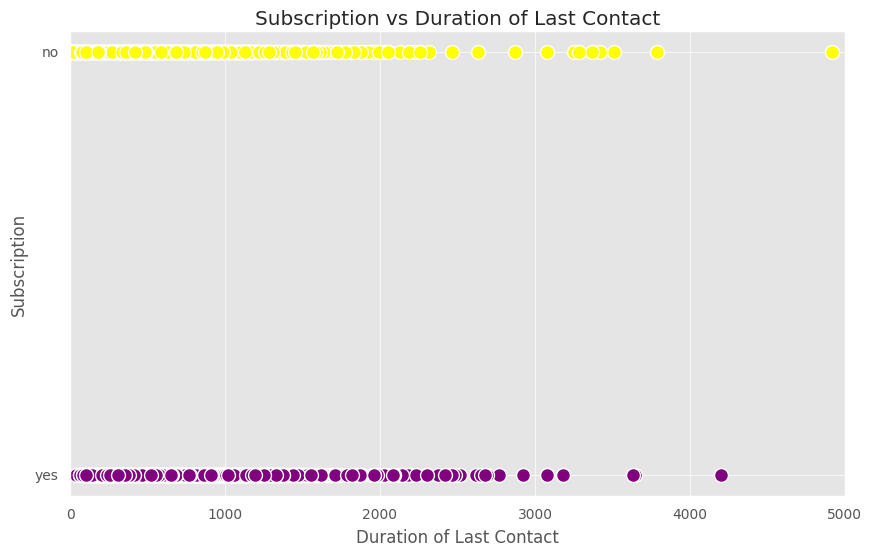

In [0]:
temp_data = pd.concat([X_train, y_train],axis=1)
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(temp_data.duration[temp_data.y=="yes"],
           temp_data.y[temp_data.y=="yes"],
           c="purple",
          s=100)

# Scatter with negative examples
plt.scatter(temp_data.duration[temp_data.y=="no"],
           temp_data.y[temp_data.y=="no"],
           c="yellow",
           s=100)

# Add some helpful info
plt.title("Subscription vs Duration of Last Contact")
plt.xlabel("Duration of Last Contact"),
plt.ylabel("Subscription"),
plt.xlim([-0.5,5000]);

In addition to the fact that "duration" is halfly deterministic (if duration = 0, y=0) and is not available until the outcome is known (the time we recorded duration of last call, we know if the client would subscribe or not), we also found that even in retrospect, there seems no correlation between length of last call and whether the client subscribe or not. So, we could safely discard this variable as well.

In [0]:
X_train.drop(["duration"], axis = 1, inplace = True)
X_test.drop(["duration"], axis = 1, inplace = True)

In [0]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6125,47,technician,married,professional.course,unknown,yes,no,telephone,may,tue,272,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7608,41,blue-collar,married,basic.4y,no,no,no,telephone,may,fri,512,2,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0
14291,42,technician,married,professional.course,unknown,yes,no,cellular,jul,mon,77,3,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
29172,32,blue-collar,single,high.school,no,yes,no,cellular,apr,fri,1080,1,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
21909,36,technician,single,university.degree,no,yes,no,cellular,aug,wed,123,1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


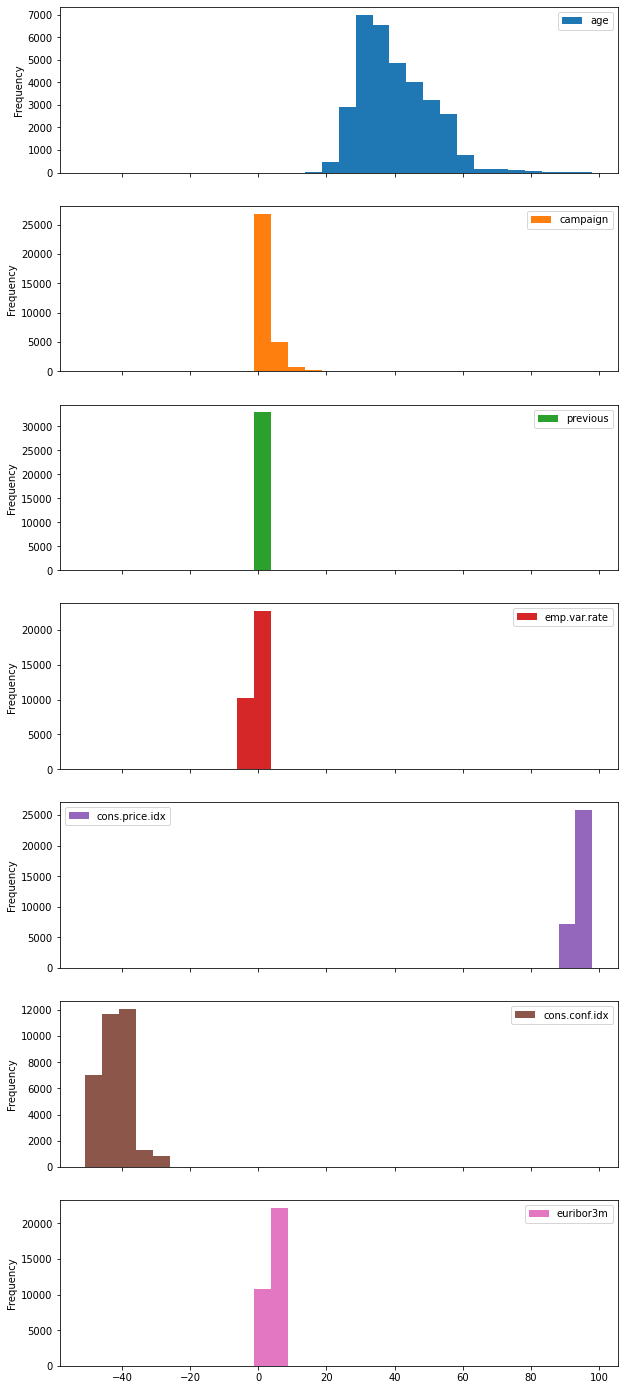

In [0]:
X_train.drop(['nr.employed', "pdays"],axis=1).plot.hist(subplots=True, figsize=(10,25), bins=30);

Other columns are still have very diverse range and apart from "age", features seems not very clearly normally distributed. We might consider a random forest model which doesnt rely on rescaling and normality first. 

Let's see if number of contacts in this campaign is correlated with that outside this campaign previously

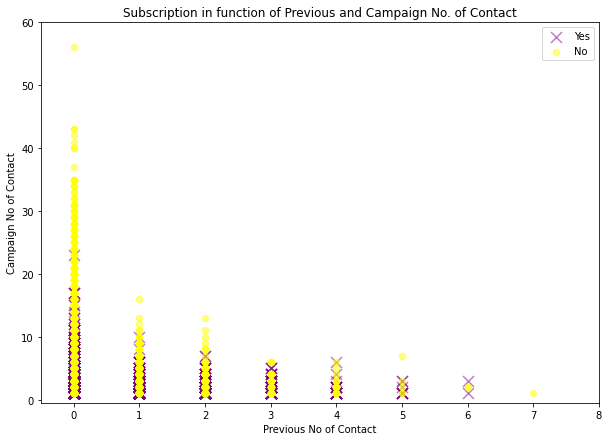

In [0]:
y_train_ind = y_train.replace(("yes","no"),(1,0))
temp_data = pd.concat([X_train, y_train_ind],axis=1)
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter(temp_data.previous[temp_data.y==1],
           temp_data.campaign[temp_data.y==1],
           c="purple",
            s=120,
            alpha=0.5,
            marker="x");

# Scatter with negative examples
plt.scatter(temp_data.previous[temp_data.y==0],
           temp_data.campaign[temp_data.y==0],
           c="yellow",
           s=40,
            alpha=0.5,
            marker="o");

# Add some helpful info
plt.title("Subscription in function of Previous and Campaign No. of Contact")
plt.xlabel("Previous No of Contact"),
plt.ylabel("Campaign No of Contact"),
plt.xlim([-0.5,8]),
plt.ylim([-0.5,60])
plt.legend(["Yes","No"]);

In [0]:
from numpy import cov
cov(X_train.previous, X_train.campaign)

array([[ 0.2466002 , -0.11028785],
       [-0.11028785,  7.69952446]])

In [0]:
corr =  -0.11028785/(np.sqrt(0.2466002)*np.sqrt(7.69952446))
corr

-0.08003851212682017

From the figure it looks like campaign and previous are highly negatively correlated but the pearson correlation statistic proves that untrue

Even though our staff called a lot more, especially to new customers, in this campaign, any efforts beyond 20 calls seems doesnt drive subscriptions much

Let's see how the 4 socioeconomic indicators correlate with subscription:

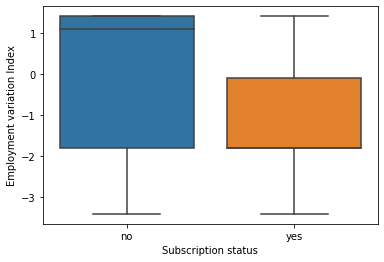

In [0]:
temp_data = pd.concat([y_train,X_train["emp.var.rate"]],axis=1)
ax = sns.boxplot(x="y", y="emp.var.rate", data=temp_data)
ax.set(ylabel="Employment variation Index",
       xlabel="Subscription status");

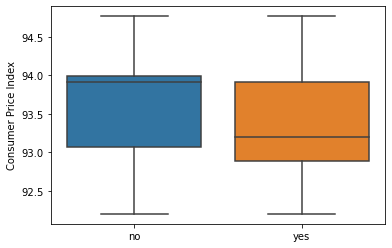

In [0]:
temp_data = pd.concat([y_train,X_train["cons.price.idx"]],axis=1)
ax = sns.boxplot(x="y", y="cons.price.idx", data=temp_data)
ax.set(
       ylabel="Consumer Price Index",
       xlabel="");

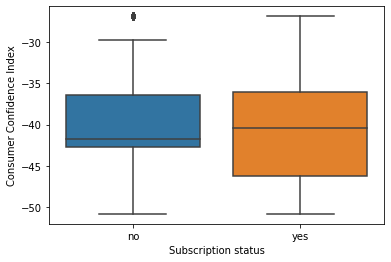

In [0]:
temp_data = pd.concat([y_train,X_train["cons.conf.idx"]],axis=1)
ax2 = sns.boxplot(x="y", y="cons.conf.idx", data=temp_data)

ax2.set(
       ylabel="Consumer Confidence Index",
       xlabel="Subscription status");

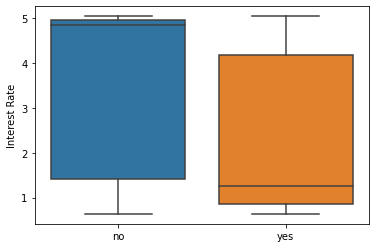

In [0]:
temp_data = pd.concat([y_train,X_train["euribor3m"]],axis=1)
ax = sns.boxplot(x="y", y="euribor3m", data=temp_data);
ax.set(
       ylabel="Interest Rate",
       xlabel="");

The predictive power of these 4 indicators seems quite limited.

Let's take an overview of the correlations between all continuous variables, as well as y

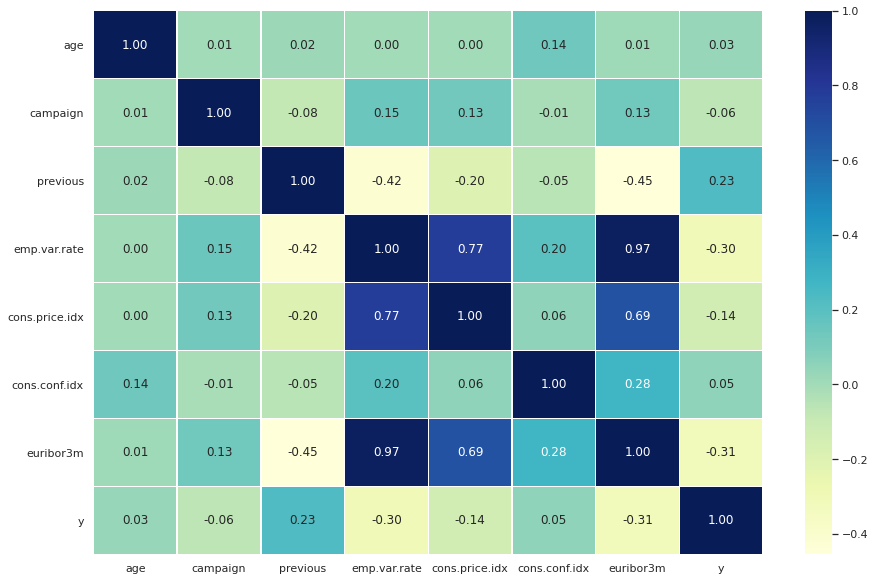

In [34]:
y_train_ind = y_train.replace(("no","yes"),(0,1))
temp_data= pd.concat([X_train,y_train_ind], axis=1)
corr_matrix = temp_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');


We could infer from the matrix that the 4 socioeconomic indicators are highly correlated, we would need to address the issue of multicollinearity if we want to use a linear model. 

We could infer from the matrix that age, campaign and consumer confidence index would have very low predictive power. Let us drop "age" and do something about campaign and cons.price.idx.

In [35]:
X_train.drop(["age"], axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
X_test.drop(["age"], axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### **Feature Engineering**

Let us try incorporate interest rate into consumer confidence index by creating a new adjusted consumer confidence index variable, which is the product of "cons.conf.idex" and "euribor3m". Note that the magnitude of interest rate is relatively small than the consumer confidence index, so our transformed new variable in fact represent more information from the original consumer index variable than the interest rate adjustment. 

In [0]:
cons_conf_idx_interest_rate_adjusted = X_train["cons.conf.idx"]*X_train["euribor3m"]


In [0]:
from numpy import cov
np.cov(cons_conf_idx_interest_rate_adjusted , y_train_ind)[1][0]/(np.std(cons_conf_idx_interest_rate_adjusted )*np.std(y_train_ind))

0.3129331519098833

Now this new variable has much more predictive power than the original consumer confidence indicator. 
In fact, we could make the same adjustment for the consumer price index.

In [38]:
cons_price_idx_interest_rate_adjusted = X_train["cons.price.idx"]*X_train["euribor3m"]
np.cov(cons_price_idx_interest_rate_adjusted , y_train_ind)[1][0]/(np.std(cons_price_idx_interest_rate_adjusted )*np.std(y_train_ind))

-0.30895434625463003

This also scales up the correlation of consumer price index with subscription rate!

We shall replace the original consumer index indicators with these 2 adjusted ones.

In [0]:
X_train["adj.cons.conf.idx"] = cons_conf_idx_interest_rate_adjusted
X_train["adj.cons.price.idx"] = cons_price_idx_interest_rate_adjusted

In [0]:
X_train.drop("cons.conf.idx", axis=1, inplace=True)
X_train.drop("cons.price.idx", axis=1, inplace=True)

In [0]:
X_test["adj.cons.conf.idx"] = X_test["cons.conf.idx"]*X_test["euribor3m"]
X_test["adj.cons.price.idx"] = X_test["cons.price.idx"]*X_test["euribor3m"]

In [0]:
X_test.drop("cons.conf.idx", axis=1, inplace=True)
X_test.drop("cons.price.idx", axis=1, inplace=True)

Can we do something to improve "campaign", which is the number of contacts we made in this campaign. 
From the figure, we know that past success rate has a lot to do with campaign outcome, so what about we incorporate this info into "campaign"?
For example, we may rescale "campaign" by a weight variable which depends on previous outcome.


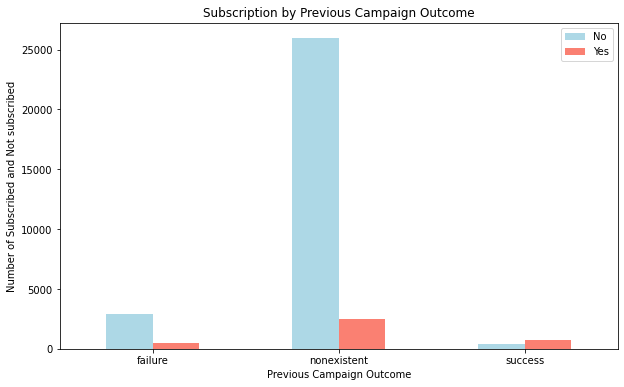

In [0]:
pd.crosstab(X_train.poutcome, y_train).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue","salmon"])
plt.title("Subscription by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Number of Subscribed and Not subscribed")
plt.legend(["No","Yes"])
plt.xticks(rotation = 0);

In [0]:
w_failure = [0.2,0.3,0.4,0.5,0.6]
w_nonexistent = [0.05, 0.1, 0.15, 0.2]
w_success = [4,5,6,7,8,9,10]
for i in w_failure:
  for j in w_nonexistent:
    for k in w_success:
        weight_campaign = X_train["poutcome"].replace(("failure","nonexistent","success"),(i,j,k))
        adj_campaign = X_train["campaign"]*weight_campaign
        corr = np.cov(adj_campaign , y_train_ind)[1][0]/(np.std(adj_campaign)*np.std(y_train_ind))
        if (corr>0.248):
           print(f"for i,j,k = {i},{j},{k}, corr = {corr}")

for i,j,k = 0.2,0.05,10, corr = 0.24822308666258597
for i,j,k = 0.3,0.05,9, corr = 0.24823647261396334
for i,j,k = 0.3,0.05,10, corr = 0.24848246351184625
for i,j,k = 0.4,0.05,8, corr = 0.24800694424497763
for i,j,k = 0.4,0.05,9, corr = 0.2483709468880659
for i,j,k = 0.4,0.05,10, corr = 0.24863885484707238
for i,j,k = 0.5,0.05,9, corr = 0.24837861474266723
for i,j,k = 0.5,0.05,10, corr = 0.24869234305403498
for i,j,k = 0.6,0.05,9, corr = 0.24826034797760574
for i,j,k = 0.6,0.05,10, corr = 0.24864339180772793


A sensible choice of the weight is (0.5,0.05,10) for previous outcome = (failure, nonexistent, success). When we multiply number of contact in this campaign by this set of weight, depending on previous campaign outcome (0.05 for new clients), we could get a linear correlation coefficient of around 0.25 between the rescaled "campaign" and "y" - a significant increase from -0.06! Let us replace the original "campaign" with this one.

In [0]:
weight_campaign = X_train["poutcome"].replace(("failure","nonexistent","success"),(0.5,0.05,10))
X_train["adj_campaign"] = X_train["campaign"]*weight_campaign
X_train.drop("campaign", axis=1, inplace=True)

In [0]:
weight_campaign = X_test["poutcome"].replace(("failure","nonexistent","success"),(0.5,0.05,10))
X_test["adj_campaign"] = X_test["campaign"]*weight_campaign
X_test.drop("campaign", axis=1, inplace=True)

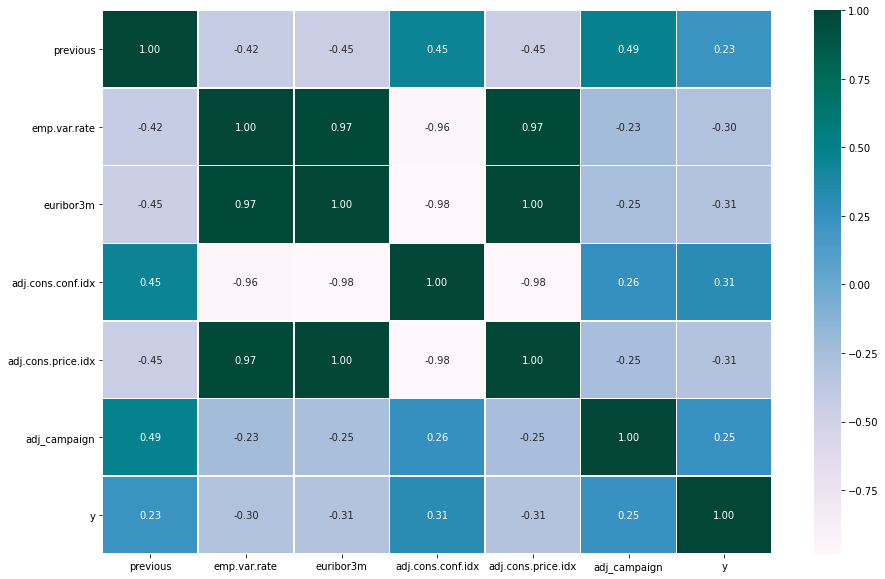

In [0]:
temp_data= pd.concat([X_train,y_train_ind], axis=1)
corr_matrix = temp_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'PuBuGn');

We can see that the adjusted features could potentially have more predictive power. However, we now have 3 pairs of features that are highly correlated.
Since the information of "euribor3m" is already captured in adj.cons.price.idx and adj.cons.conf.idx, we can safely discard it from our data. The emp.var.rate has very high linear correlation with "euribor3m" even before we made any changes to the features. In this sense, it might be better to also discard it alongside "euribor3m"

In [0]:
X_test.drop(["euribor3m","emp.var.rate"], axis=1, inplace=True)
X_train.drop(["euribor3m","emp.var.rate"], axis=1, inplace=True)


Let's look at the categorical variables.

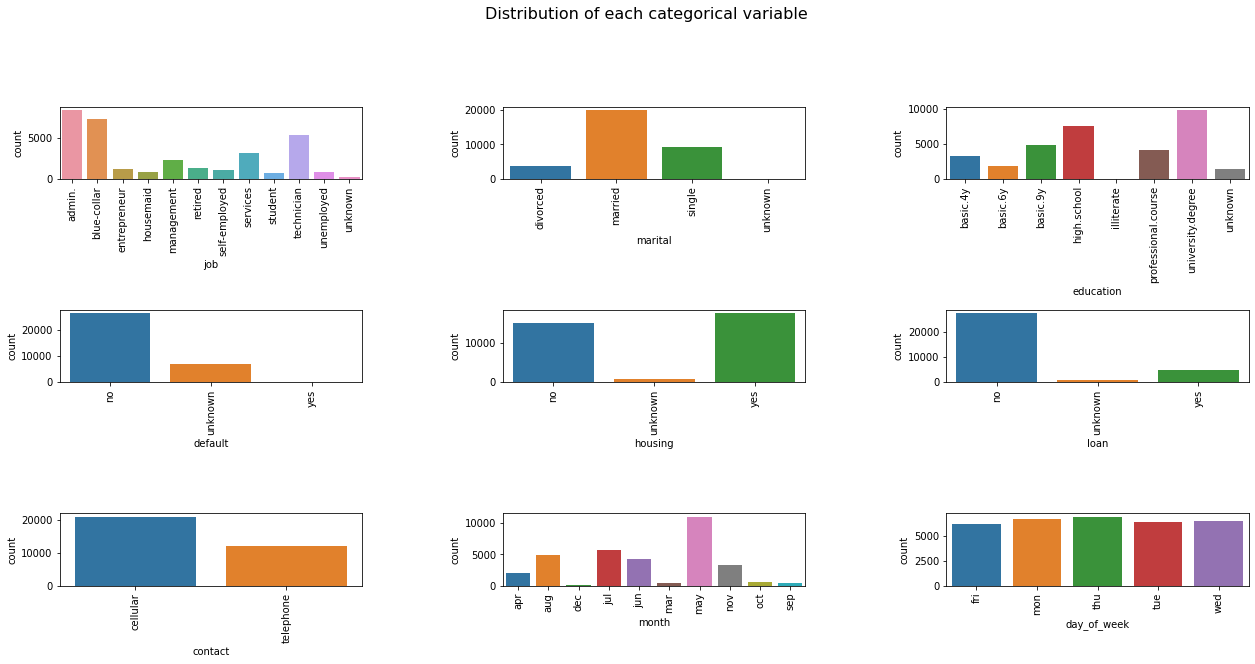

In [0]:
categorical = [
  'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week'
]
temp_data = pd.concat([X_train, y_train_ind], axis=1)

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout(pad=11.0)
fig.suptitle("Distribution of each categorical variable", fontsize = 16)

for variable, subplot in zip(categorical, ax.flatten()):
    order = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).index)
    sns.countplot(X_train[variable], ax=subplot, order = order)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



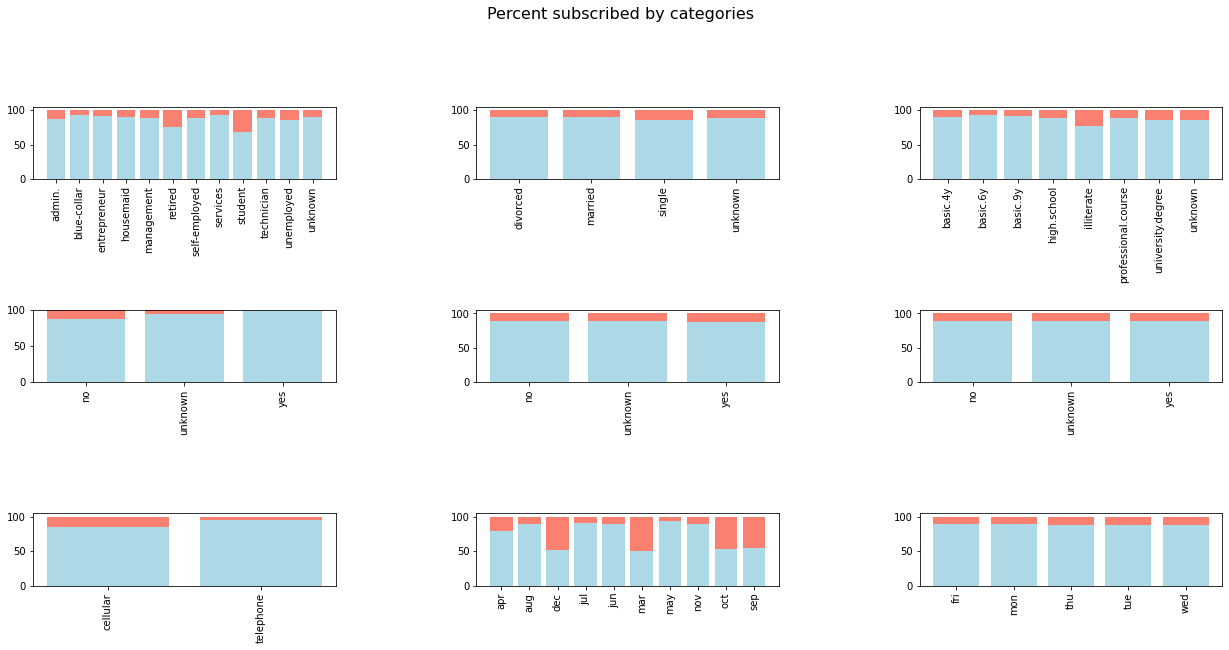

In [0]:

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
fig.tight_layout(pad=11.0)
fig.suptitle("Percent subscribed by categories", fontsize = 16)

for variable, subplot, index in zip(categorical, ax.flatten(),range(9)):
    x = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).index)
    y1 = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).iloc[:, 0])
    y2 = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).iloc[:, 1])
    total = np.add(y1,y2)
    p1 = np.divide(y1,total)*100
    p2 = np.divide(y2,total)*100
    #ax[1][0].bar
    ax.flat[index].bar(x, p1, label='No', color='lightblue')
    # stack y2 on top of y1.
    ax.flat[index].bar(x, p2, bottom=p1, label='Yes', color='salmon')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


We have a few meaningful observations here:
1. Last contact Weekday seems doesn't affect the subscription rate much, but Month do. And interestingly, the few months which not many calls were made - Sep, Oct, Dec, Mar, seem to be the time when most subscription happens! Maybe we could provide some incentives for staff to make more calls in these months!
2. Contacts made through Cellular phones are more effective in a sense that over half of the clients were last contacted through cellular and more subscription rate for them.
3. Not surpsingly illiterate clients are underrepresented in our population, but they actually had almost twice subscription rate than the rest. Otherwise, more educated clients had slightly higher subscription rate.
4. Clients whose occupation is unknown also performed impressively - maybe we could learn more about their background.
5. Clients who stated no default history had higher subscription rate than the rest of the population, while another 2 credit history indicators - "housing loan" and "personal loan" seems have very limited predictive power.
6. Single clients also has higher subsciption.
7. Students and retired population had higher subscription rate than other working population.

Of course, the observations haven't yet proved to be statistically significant.

## ****Let's see in the months of popular subscription confirmation, what are the traits of clients and campaign.****

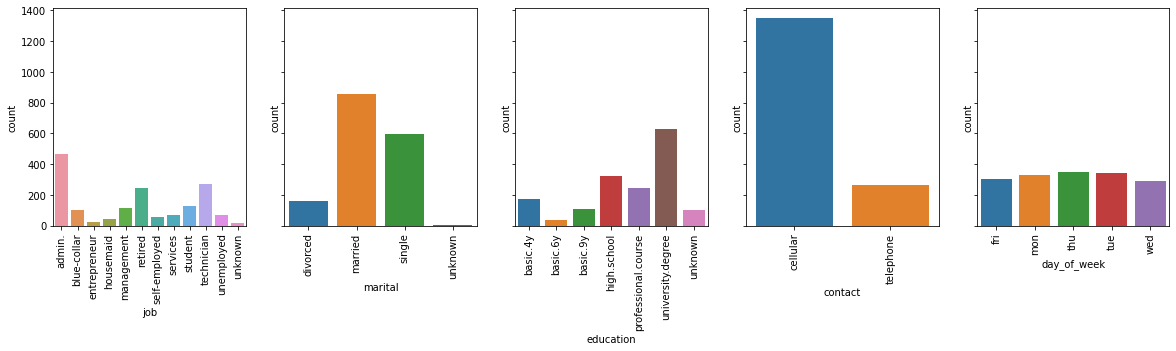

In [0]:
categorical = [
  'job', 'marital', 'education', 'contact','day_of_week'
]
temp_data = pd.concat([X_train, y_train_ind], axis=1)
temp_data = temp_data[temp_data["month"].isin(["dec","mar","oct","sep"])]
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for variable, subplot in zip(categorical, ax.flatten()):
    order = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).index)
    sns.countplot(temp_data[variable], ax=subplot, order = order)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


It seems like our staff have some preference over what kind of people to contact in the most-subscription-months. People working in admin and technical sectors, people who have higher education, as well as retired are overly represented. Further, a vast majority of the calls were made through cell phones.

#### Merging categories based on frequency:

In [0]:
X_train["job"].unique()

array(['technician', 'blue-collar', 'management', 'self-employed',
       'admin.', 'services', 'entrepreneur', 'student', 'unemployed',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [0]:
X_train["job"]=X_train["job"].replace(('management', 'self-employed',
       'services', 'entrepreneur', 'student', 'unemployed',
       'housemaid', 'retired', 'unknown'),
                                      ('other', 'other',
       'other', 'other', 'student/retired', 'other',
       'other', 'student/retired', 'other'))

In [0]:
X_train["job"].unique()

array(['technician', 'blue-collar', 'other', 'admin.', 'student/retired'],
      dtype=object)

In [0]:
X_train.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [0]:
X_train.marital=X_train.marital.replace(("divorced","unknown"),("other","other"))

In [0]:
X_train.marital.unique()

array(['married', 'single', 'other'], dtype=object)

In [0]:
X_train["education"].value_counts()

university.degree      9810
high.school            7618
basic.9y               4840
professional.course    4180
basic.4y               3319
basic.6y               1793
unknown                1373
illiterate               17
Name: education, dtype: int64

In [0]:
X_train["education"]= X_train["education"].replace(("university.degree","high.school","basic.9y","professional.course","basic.4y","basic.6y","unknown","illiterate"),
                                                   ("university/professional.degree","high.school","basic/lower/unknown","university/professional.degree",
                                                    "basic/lower/unknown","basic/lower/unknown","basic/lower/unknown","basic/lower/unknown"))

In [0]:
X_train["default"].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [0]:
X_train["default"] = X_train.default.replace(("unknown","yes"),("yes/other","yes/other"))

In [0]:
X_train.default.unique()

array(['yes/other', 'no'], dtype=object)

In [0]:
X_train.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [0]:
X_train.housing = X_train.housing.replace(("no","unknown"),("no/other","no/other"))
X_train.housing.unique()

In [0]:
X_train.month  = X_train.month.replace(("sep","oct","dec","mar"),("sep/oct/dec/mar","sep/oct/dec/mar","sep/oct/dec/mar","sep/oct/dec/mar"))

In [0]:
X_train.month.unique()

array(['may', 'jul', 'apr', 'aug', 'sep/oct/dec/mar', 'nov', 'jun'],
      dtype=object)

In [0]:
X_test["job"]=X_test["job"].replace(('management', 'self-employed',
       'services', 'entrepreneur', 'student', 'unemployed',
       'housemaid', 'retired', 'unknown'),
                                      ('other', 'other',
       'other', 'other', 'student/retired', 'other',
       'other', 'student/retired', 'other'))
X_test.marital=X_test.marital.replace(("divorced","unknown"),("other","other"))
X_test["education"]= X_test["education"].replace(("university.degree","high.school","basic.9y","professional.course","basic.4y","basic.6y","unknown","illiterate"),
                                                   ("university/professional.degree","high.school","basic/lower/unknown","university/professional.degree",
                                                    "basic/lower/unknown","basic/lower/unknown","basic/lower/unknown","basic/lower/unknown"))
X_test["default"] = X_test.default.replace(("unknown","yes"),("yes/other","yes/other"))
X_test.housing = X_test.housing.replace(("no","unknown"),("no/other","no/other"))
X_test.month  = X_test.month.replace(("sep","oct","dec","mar"),("sep/oct/dec/mar","sep/oct/dec/mar","sep/oct/dec/mar","sep/oct/dec/mar"))

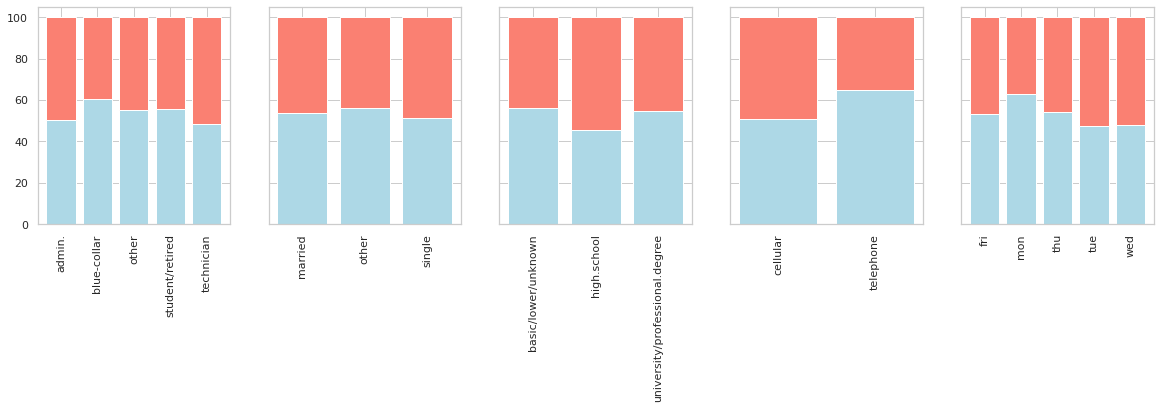

In [56]:
categorical = [
  'job', 'marital', 'education', 'contact','day_of_week'
]
temp_data = pd.concat([X_train, y_train_ind], axis=1)
temp_data = temp_data[temp_data["month"].isin(["sep/oct/dec/mar"])]
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for variable, subplot, index in zip(categorical, ax.flatten(),range(5)):
    x = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).index)
    y1 = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).iloc[:, 0])
    y2 = np.array(pd.crosstab(temp_data[variable], temp_data["y"]).iloc[:, 1])
    total = np.add(y1,y2)
    p1 = np.divide(y1,total)*100
    p2 = np.divide(y2,total)*100
    #ax[1][0].bar
    ax.flat[index].bar(x, p1, label='No', color='lightblue')
    # stack y2 on top of y1.
    ax.flat[index].bar(x, p2, bottom=p1, label='Yes', color='salmon')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Here we have some findings related to success rate:
1. People working in admin and tech did subscribe more likey than the rest, but not by much, so it would be a good idea to diversity the occupations in which we choose to call. 
2. Although staff tend to contact higher educated clients in these  seasons, the subscription rate was actually lower than high school.
3. Although way more calls were made through cell phones, the gap in subscription rate between cellular and telephone calls actually narrowed down a lot compared to all year round aggregate statistics - so a good idea is to call more through telephones in these months.
4. Monday seems performs worst than other weekdays in terms of subscription rate.

Let us first select only those categorical features that are more correlated to subscription 

In [0]:
X_train.drop(['default', 'housing', 'loan','day_of_week'],axis=1, inplace = True)
X_test.drop(['default', 'housing', 'loan','day_of_week'],axis=1, inplace = True)

## Data Preprocessing

Let us standardize the data to make training on a wider diversity of models possible, since our numerical features has very diverse magnitude. 

In [0]:
num_cols = ["previous","adj_campaign","adj.cons.price.idx","adj.cons.conf.idx"]
cat_cols = ['job', 'marital', 'education',
       'contact', 'month','poutcome','nr.employed']

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler().fit(X_train[num_cols])

stand_num_X_train = pd.DataFrame(scaler.transform(X_train[num_cols]),columns=num_cols).reset_index(drop=True)
stand_num_X_test = pd.DataFrame(scaler.transform(X_test[num_cols]),columns = num_cols).reset_index(drop=True)
cat_X_train = pd.DataFrame(X_train[cat_cols]).reset_index(drop=True)
cat_X_test = pd.DataFrame(X_test[cat_cols]).reset_index(drop=True)


stand_X_train = pd.concat([stand_num_X_train, cat_X_train], axis=1)
stand_X_test = pd.concat([stand_num_X_test, cat_X_test], axis=1)

#### Convert the non numerical labels to numerical ones 

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [0]:
stand_X = pd.concat([stand_X_train, stand_X_test])

In [124]:
stand_X.head()

,previous,adj_campaign,adj.cons.price.idx,adj.cons.conf.idx,job,marital,education,contact,month,poutcome,nr.employed
0,0.0,0.001251,0.959707,0.183325,technician,married,university/professional.degree,telephone,may,nonexistent,5100-5199
1,0.0,0.000625,0.961296,0.182003,blue-collar,married,basic/lower/unknown,telephone,may,nonexistent,5100-5199
2,0.0,0.001251,0.982634,0.001329,technician,married,university/professional.degree,cellular,jul,nonexistent,5200orAbove
3,0.0,0.000000,0.172879,0.757179,blue-collar,single,high.school,cellular,apr,nonexistent,Below5100
4,0.0,0.000000,0.977404,0.170846,technician,single,university/professional.degree,cellular,aug,nonexistent,5200orAbove


In [0]:
one_hot = OneHotEncoder()
cat_cols = ['job', 'marital', 'education',
       'contact', 'month', 'poutcome','nr.employed']
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  cat_cols)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(stand_X)

In [126]:
transformed_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.25078174e-03, 9.59706645e-01, 1.83325241e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.25390869e-04, 9.61295858e-01, 1.82003428e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.25078174e-03, 9.82633976e-01, 1.32907531e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.25390869e-04, 9.59706645e-01, 1.83325241e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.25390869e-04, 1.48477872e-01, 7.89143914e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.18824265e-02, 1.46682903e-01, 7.91061268e-01]])

In [0]:
transformed_X_train = transformed_X[:32950]
transformed_X_test = transformed_X[32950:]
transformed_y_train = y_train.replace(("yes","no"),(1,0))
transformed_y_test = y_test.replace(("yes","no"),(1,0))

In [128]:
transformed_X_train.shape, transformed_X_test.shape

((32950, 30), (8238, 30))

### Modelling

Let's try fit the training data with Logistic regression, Complement Naive Bayes and Random Forest classifier, then compare the accuracy and f1 score under 5-fold cross validation. We choose also f1 because our data has imbalanced class and accuracy is of limited value, while f1 could give us an aggregate measure on recall and precision, both reflects the modelling efficiency better.

In [0]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [0]:
models = {"Logistic Regression": LogisticRegression(max_iter = 1000),
          "Complement Naive Bayes": ComplementNB(),
          "Random Forest": RandomForestClassifier(n_estimators=20)}

def fit_and_score(models, transformed_X_train, transformed_y_train):
    for name, model in models.items():
        clf = model.fit(transformed_X_train, transformed_y_train)
        acc = np.mean(cross_val_score( clf, transformed_X_train, transformed_y_train,cv=5, n_jobs=-1))
        f1 = np.mean(cross_val_score( clf, transformed_X_train, transformed_y_train, scoring = "f1",cv=5, n_jobs=-1))
        print(f"{name}: cv accuracy:{acc}, cv f1 score:{f1}")

In [157]:
models_score = fit_and_score(models,
                             transformed_X_train, 
                             transformed_y_train
                             )

Logistic Regression: cv accuracy:0.8987961557916033, cv f1 score:0.2960235084208743
Complement Naive Bayes: cv accuracy:0.7440667678300454, cv f1 score:0.3781928573804205
Random Forest: cv accuracy:0.8848457258472433, cv f1 score:0.3651505905354467


Our models do not perform well in terms of f1 score, this is probably due to the fact that our data has imbalanced class. Since the Random Forest classifier accuracy but not much lower f1 than Complement Naive Bayes classifier. We shall focus on it. 

Hyperparameter Tuning with Randomized Grid Search

In [0]:
# Create a hyperamaeter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(20,200,10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,4)}

In [161]:
np.random.seed(45)

# Setup random hyperparameter search for RandomForest()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random hyperparameter search model for RandomForest
rs_rf.fit(transformed_X_train, transformed_y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [162]:
rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 160}

In [163]:
# Evaluate the accuaracy of the randomized search RF Classifier
rs_rf.score(transformed_X_test, transformed_y_test)

0.8976693372177713

In [0]:
# What about the ROC curve?

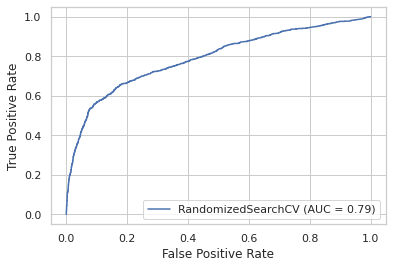

In [164]:
plot_roc_curve(rs_rf, transformed_X_test, transformed_y_test);

In [0]:
y_preds= rs_rf.predict(transformed_X_test)

Let's look at the confusion matrix

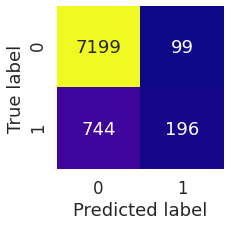

In [169]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                     fmt='d',
                     cmap="plasma")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
plot_conf_mat(transformed_y_test, y_preds);   
    

In [168]:
print(classification_report(transformed_y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7298
           1       0.66      0.21      0.32       940

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

